<a href="https://colab.research.google.com/github/Eason0227/Aidea-AOI-defects-detection/blob/main/DL_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/yahyamomtaz/rul-prediction-using-lstm-for-aircraft-engine  
https://www.kaggle.com/code/easmeileabrhim/rul-predict-by-cnn-lstm

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import random
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['sensor_{}'.format(i) for i in range(1,22)]
col_names = index_names + setting_names + sensor_names

In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/NASA Turbofan Jet Engine Data Set/data/'
df_train = pd.read_csv(path+'train_FD001.txt',sep='\s+',header=None,index_col=False,names=col_names) #\s表示以空白為間隔
df_test = pd.read_csv(path+'test_FD001.txt',sep='\s+',header=None,index_col=False,names=col_names)
y_test = pd.read_csv(path+'RUL_FD001.txt',sep='\s+',header=None,index_col=False,names=['RUL'])
y_test.shape

(100, 1)

In [4]:
train = df_train.copy()
test = df_test.copy()
display(train)
display(test)

unit_number  time_cycles  setting_1  setting_2  setting_3  sensor_1  \
0                1            1    -0.0007    -0.0004      100.0    518.67   
1                1            2     0.0019    -0.0003      100.0    518.67   
2                1            3    -0.0043     0.0003      100.0    518.67   
3                1            4     0.0007     0.0000      100.0    518.67   
4                1            5    -0.0019    -0.0002      100.0    518.67   
...            ...          ...        ...        ...        ...       ...   
20626          100          196    -0.0004    -0.0003      100.0    518.67   
20627          100          197    -0.0016    -0.0005      100.0    518.67   
20628          100          198     0.0004     0.0000      100.0    518.67   
20629          100          199    -0.0011     0.0003      100.0    518.67   
20630          100          200    -0.0032    -0.0005      100.0    518.67   

       sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_12  sensor_13  \
0        641.82   1589.70   1400.60     14.62  ...     521.66    2388.02   
1        642.15   1591.82   1403.14     14.62  ...     522.28    2388.07   
2        642.35   1587.99   1404.20     14.62  ...     522.42    2388.03   
3        642.35   1582.79   1401.87     14.62  ...     522.86    2388.08   
4        642.37   1582.85   1406.22     14.62  ...     522.19    2388.04   
...         ...       ...       ...       ...  ...        ...        ...   
20626    643.49   1597.98   1428.63     14.62  ...     519.49    2388.26   
20627    643.54   1604.50   1433.58     14.62  ...     519.68    2388.22   
20628    643.42   1602.46   1428.18     14.62  ...     520.01    2388.24   
20629    643.23   1605.26   1426.53     14.62  ...     519.67    2388.23   
20630    643.85   1600.38   1432.14     14.62  ...     519.30    2388.26   

       sensor_14  sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  \
0        8138.62     8.4195       0.03        392       2388      100.0   
1        8131.49     8.4318       0.03        392       2388      100.0   
2        8133.23     8.4178       0.03        390       2388      100.0   
3        8133.83     8.3682       0.03        392       2388      100.0   
4        8133.80     8.4294       0.03        393       2388      100.0   
...          ...        ...        ...        ...        ...        ...   
20626    8137.60     8.4956       0.03        397       2388      100.0   
20627    8136.50     8.5139       0.03        395       2388      100.0   
20628    8141.05     8.5646       0.03        398       2388      100.0   
20629    8139.29     8.5389       0.03        395       2388      100.0   
20630    8137.33     8.5036       0.03        396       2388      100.0   

       sensor_20  sensor_21  
0          39.06    23.4190  
1          39.00    23.4236  
2          38.95    23.3442  
3          38.88    23.3739  
4          38.90    23.4044  
...          ...        ...  
20626      38.49    22.9735  
20627      38.30    23.1594  
20628      38.44    22.9333  
20629      38.29    23.0640  
20630      38.37    23.0522  

[20631 rows x 26 columns]

unit_number  time_cycles  setting_1  setting_2  setting_3  sensor_1  \
0                1            1     0.0023     0.0003      100.0    518.67   
1                1            2    -0.0027    -0.0003      100.0    518.67   
2                1            3     0.0003     0.0001      100.0    518.67   
3                1            4     0.0042     0.0000      100.0    518.67   
4                1            5     0.0014     0.0000      100.0    518.67   
...            ...          ...        ...        ...        ...       ...   
13091          100          194     0.0049     0.0000      100.0    518.67   
13092          100          195    -0.0011    -0.0001      100.0    518.67   
13093          100          196    -0.0006    -0.0003      100.0    518.67   
13094          100          197    -0.0038     0.0001      100.0    518.67   
13095          100          198     0.0013     0.0003      100.0    518.67   

       sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_12  sensor_13  \
0        643.02   1585.29   1398.21     14.62  ...     521.72    2388.03   
1        641.71   1588.45   1395.42     14.62  ...     522.16    2388.06   
2        642.46   1586.94   1401.34     14.62  ...     521.97    2388.03   
3        642.44   1584.12   1406.42     14.62  ...     521.38    2388.05   
4        642.51   1587.19   1401.92     14.62  ...     522.15    2388.03   
...         ...       ...       ...       ...  ...        ...        ...   
13091    643.24   1599.45   1415.79     14.62  ...     520.69    2388.00   
13092    643.22   1595.69   1422.05     14.62  ...     521.05    2388.09   
13093    643.44   1593.15   1406.82     14.62  ...     521.18    2388.04   
13094    643.26   1594.99   1419.36     14.62  ...     521.33    2388.08   
13095    642.95   1601.62   1424.99     14.62  ...     521.07    2388.05   

       sensor_14  sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  \
0        8125.55     8.4052       0.03        392       2388      100.0   
1        8139.62     8.3803       0.03        393       2388      100.0   
2        8130.10     8.4441       0.03        393       2388      100.0   
3        8132.90     8.3917       0.03        391       2388      100.0   
4        8129.54     8.4031       0.03        390       2388      100.0   
...          ...        ...        ...        ...        ...        ...   
13091    8213.28     8.4715       0.03        394       2388      100.0   
13092    8210.85     8.4512       0.03        395       2388      100.0   
13093    8217.24     8.4569       0.03        395       2388      100.0   
13094    8220.48     8.4711       0.03        395       2388      100.0   
13095    8214.64     8.4903       0.03        396       2388      100.0   

       sensor_20  sensor_21  
0          38.86    23.3735  
1          39.02    23.3916  
2          39.08    23.4166  
3          39.00    23.3737  
4          38.99    23.4130  
...          ...        ...  
13091      38.65    23.1974  
13092      38.57    23.2771  
13093      38.62    23.2051  
13094      38.66    23.2699  
13095      38.70    23.1855  

[13096 rows x 26 columns]

In [5]:
print('Shape of the train dataset : ',train.shape)
print('Shape of the test dataset : ',test.shape)

Shape of the train dataset :  (20631, 26)
Shape of the test dataset :  (13096, 26)


In [6]:
def add_RUL_column(df):
    max_time_cycles = df.groupby(by='unit_number')['time_cycles'].max()
    merged = df.merge( max_time_cycles.to_frame(name='max_time_cycle'), left_on='unit_number',right_index=True)
    merged["RUL"] = merged["max_time_cycle"] - merged['time_cycles']
    merged = merged.drop("max_time_cycle", axis=1) 
    return merged
train = add_RUL_column(train)
display(train)

unit_number  time_cycles  setting_1  setting_2  setting_3  sensor_1  \
0                1            1    -0.0007    -0.0004      100.0    518.67   
1                1            2     0.0019    -0.0003      100.0    518.67   
2                1            3    -0.0043     0.0003      100.0    518.67   
3                1            4     0.0007     0.0000      100.0    518.67   
4                1            5    -0.0019    -0.0002      100.0    518.67   
...            ...          ...        ...        ...        ...       ...   
20626          100          196    -0.0004    -0.0003      100.0    518.67   
20627          100          197    -0.0016    -0.0005      100.0    518.67   
20628          100          198     0.0004     0.0000      100.0    518.67   
20629          100          199    -0.0011     0.0003      100.0    518.67   
20630          100          200    -0.0032    -0.0005      100.0    518.67   

       sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_13  sensor_14  \
0        641.82   1589.70   1400.60     14.62  ...    2388.02    8138.62   
1        642.15   1591.82   1403.14     14.62  ...    2388.07    8131.49   
2        642.35   1587.99   1404.20     14.62  ...    2388.03    8133.23   
3        642.35   1582.79   1401.87     14.62  ...    2388.08    8133.83   
4        642.37   1582.85   1406.22     14.62  ...    2388.04    8133.80   
...         ...       ...       ...       ...  ...        ...        ...   
20626    643.49   1597.98   1428.63     14.62  ...    2388.26    8137.60   
20627    643.54   1604.50   1433.58     14.62  ...    2388.22    8136.50   
20628    643.42   1602.46   1428.18     14.62  ...    2388.24    8141.05   
20629    643.23   1605.26   1426.53     14.62  ...    2388.23    8139.29   
20630    643.85   1600.38   1432.14     14.62  ...    2388.26    8137.33   

       sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  \
0         8.4195       0.03        392       2388      100.0      39.06   
1         8.4318       0.03        392       2388      100.0      39.00   
2         8.4178       0.03        390       2388      100.0      38.95   
3         8.3682       0.03        392       2388      100.0      38.88   
4         8.4294       0.03        393       2388      100.0      38.90   
...          ...        ...        ...        ...        ...        ...   
20626     8.4956       0.03        397       2388      100.0      38.49   
20627     8.5139       0.03        395       2388      100.0      38.30   
20628     8.5646       0.03        398       2388      100.0      38.44   
20629     8.5389       0.03        395       2388      100.0      38.29   
20630     8.5036       0.03        396       2388      100.0      38.37   

       sensor_21  RUL  
0        23.4190  191  
1        23.4236  190  
2        23.3442  189  
3        23.3739  188  
4        23.4044  187  
...          ...  ...  
20626    22.9735    4  
20627    23.1594    3  
20628    22.9333    2  
20629    23.0640    1  
20630    23.0522    0  

[20631 rows x 27 columns]

In [7]:
Sensor_dictionary={}
dict_list=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
i=1
for x in dict_list :
    Sensor_dictionary['sensor_'+str(i)]=x
    i+=1
Sensor_dictionary

{'sensor_1': '(Fan inlet temperature) (◦R)',
 'sensor_2': '(LPC outlet temperature) (◦R)',
 'sensor_3': '(HPC outlet temperature) (◦R)',
 'sensor_4': '(LPT outlet temperature) (◦R)',
 'sensor_5': '(Fan inlet Pressure) (psia)',
 'sensor_6': '(bypass-duct pressure) (psia)',
 'sensor_7': '(HPC outlet pressure) (psia)',
 'sensor_8': '(Physical fan speed) (rpm)',
 'sensor_9': '(Physical core speed) (rpm)',
 'sensor_10': '(Engine pressure ratio(P50/P2)',
 'sensor_11': '(HPC outlet Static pressure) (psia)',
 'sensor_12': '(Ratio of fuel flow to Ps30) (pps/psia)',
 'sensor_13': '(Corrected fan speed) (rpm)',
 'sensor_14': '(Corrected core speed) (rpm)',
 'sensor_15': '(Bypass Ratio) ',
 'sensor_16': '(Burner fuel-air ratio)',
 'sensor_17': '(Bleed Enthalpy)',
 'sensor_18': '(Required fan speed)',
 'sensor_19': '(Required fan conversion speed)',
 'sensor_20': '(High-pressure turbines Cool air flow)',
 'sensor_21': '(Low-pressure turbines Cool air flow)'}

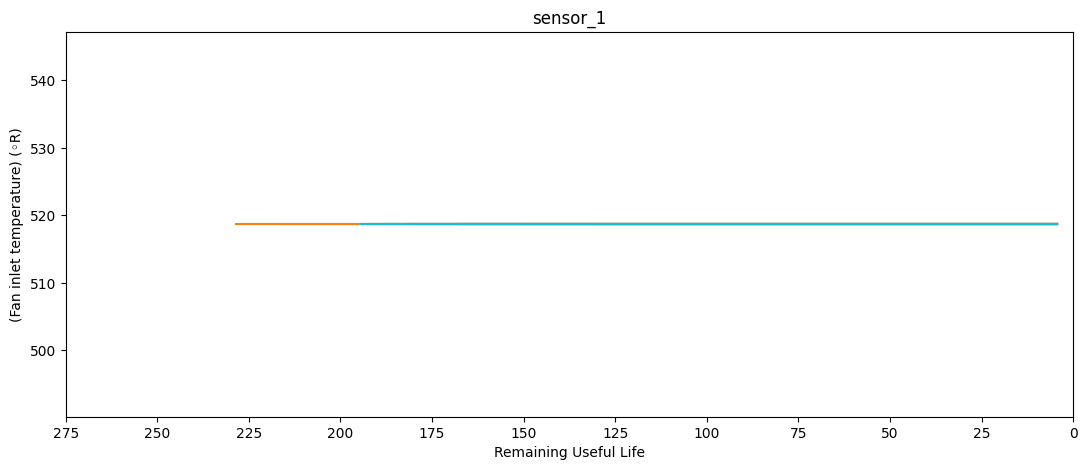

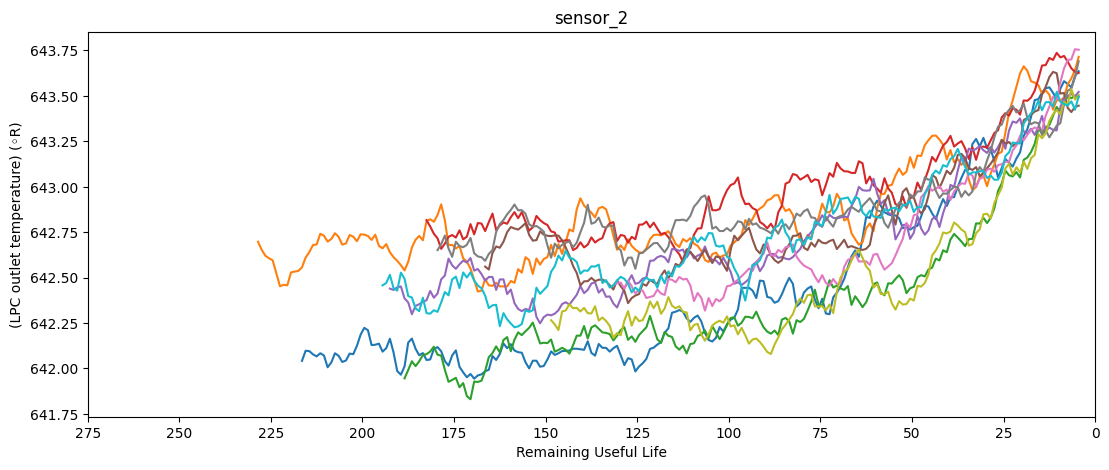

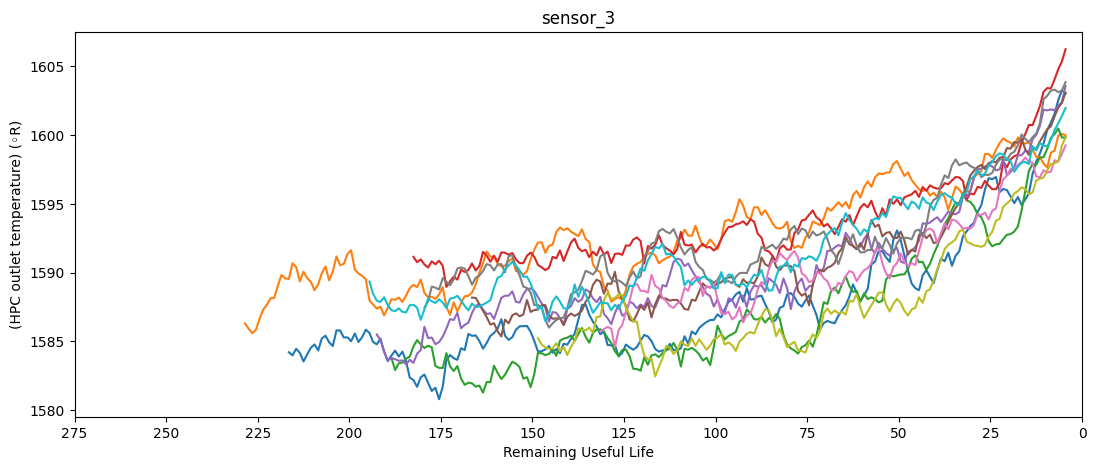

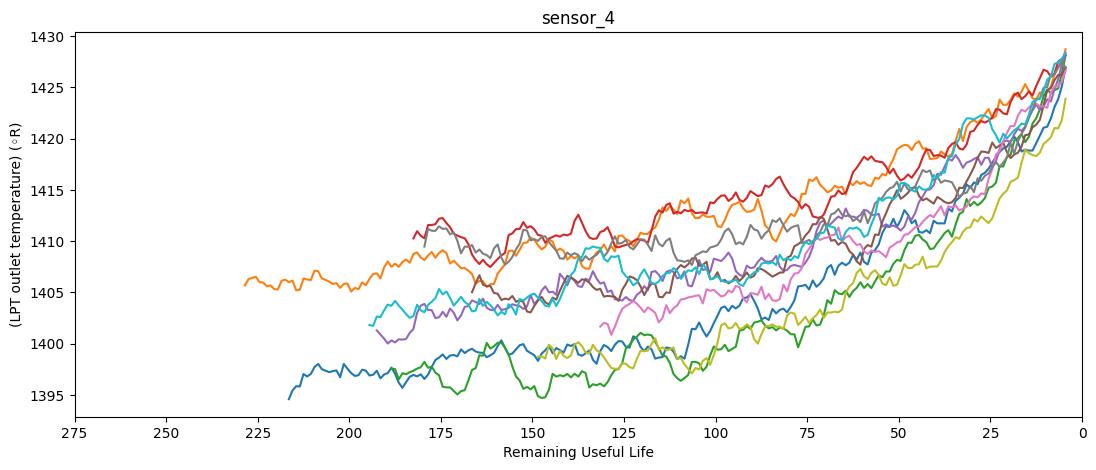

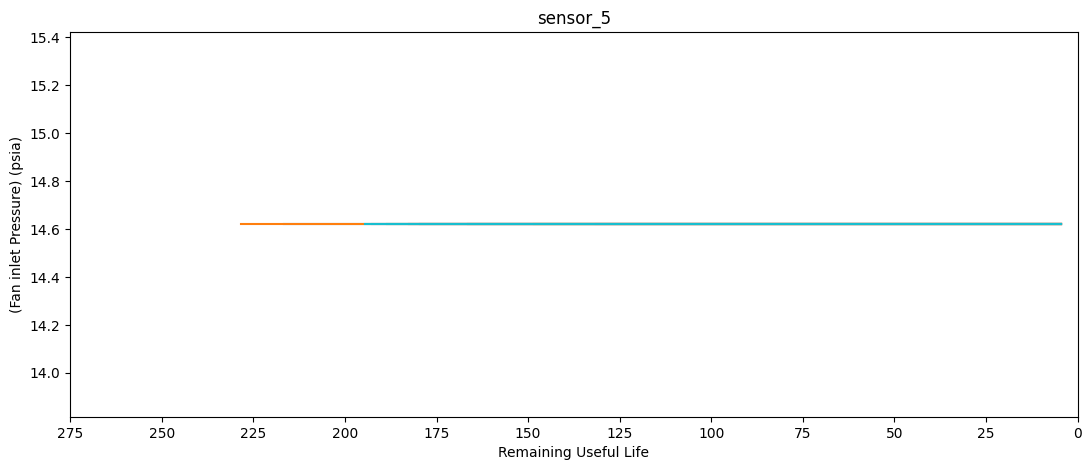

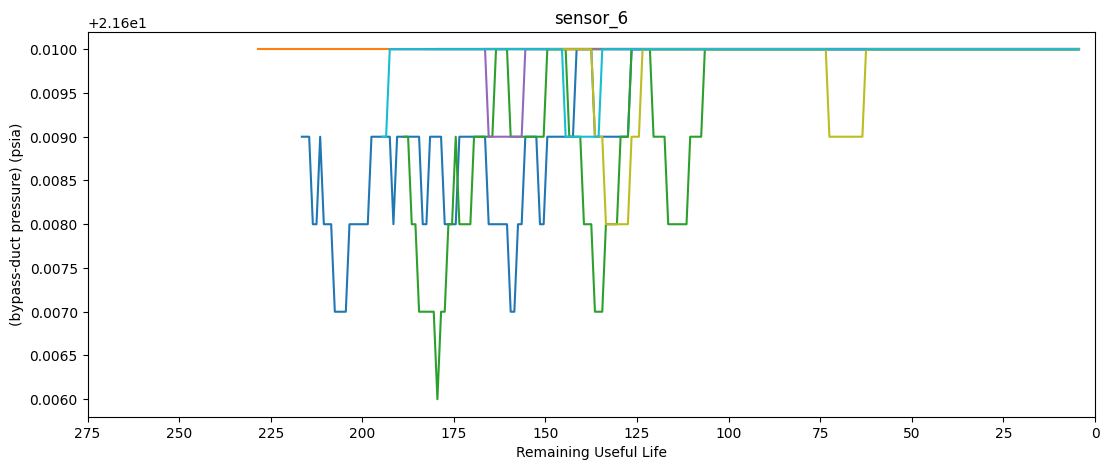

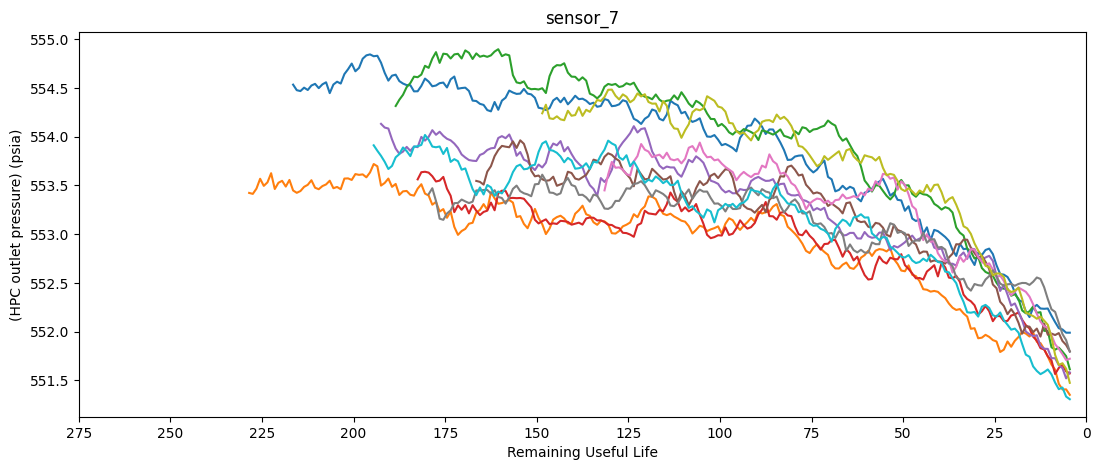

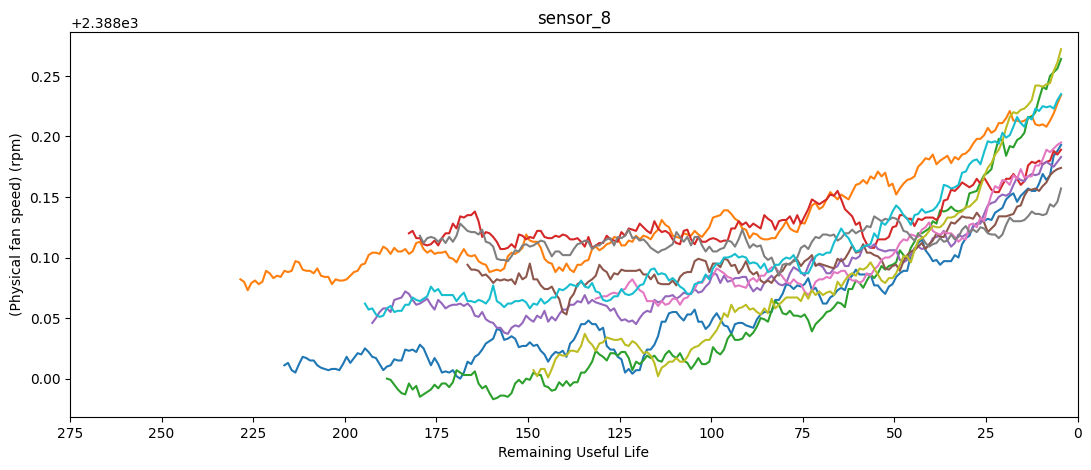

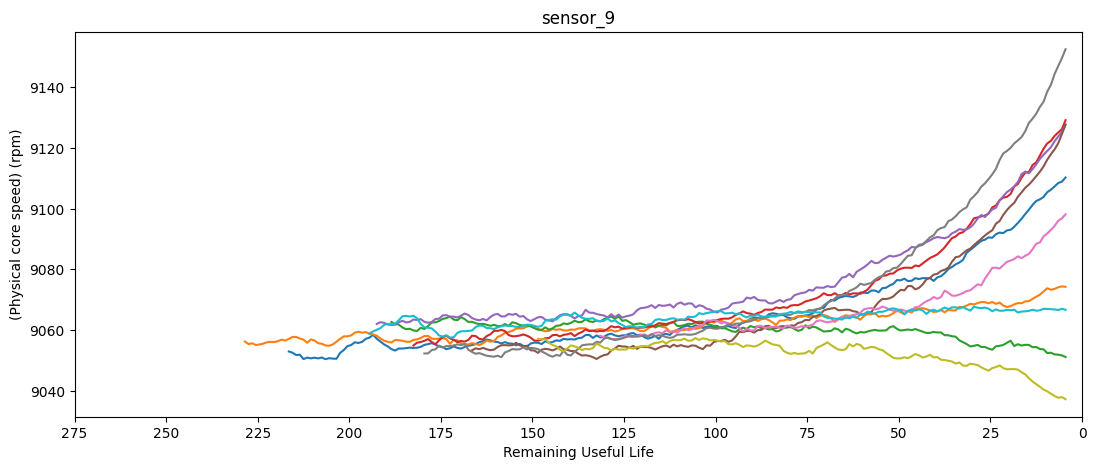

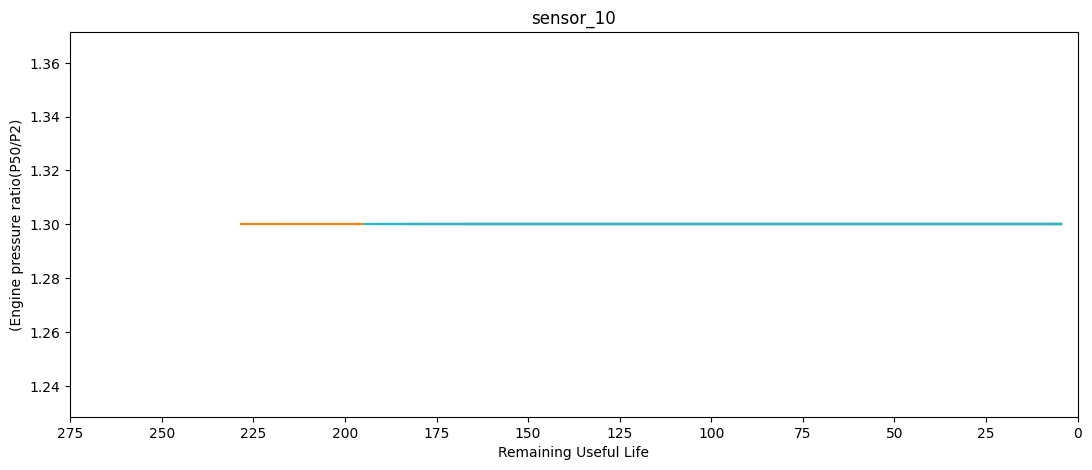

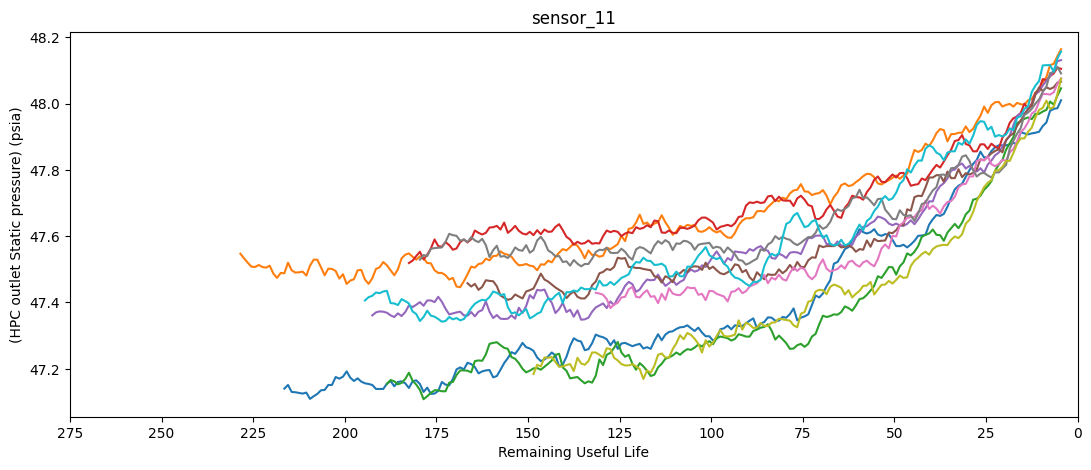

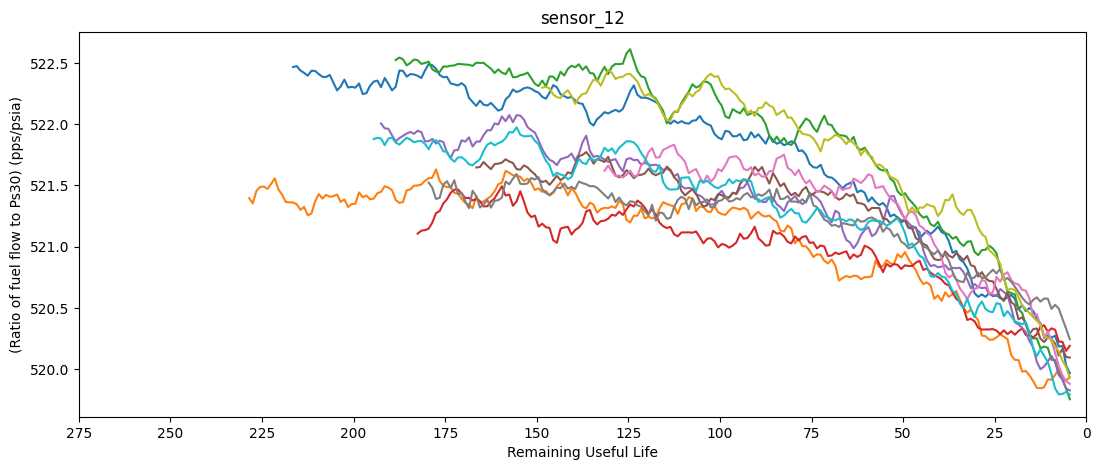

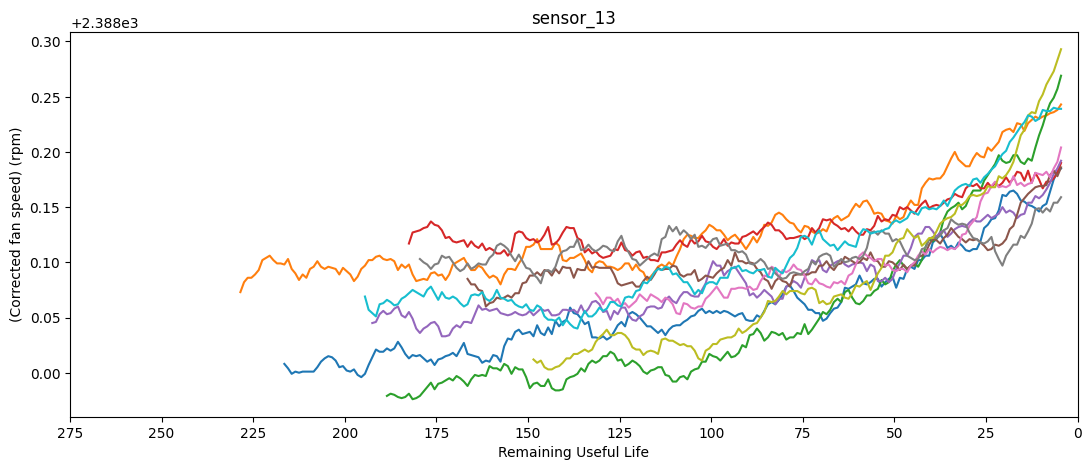

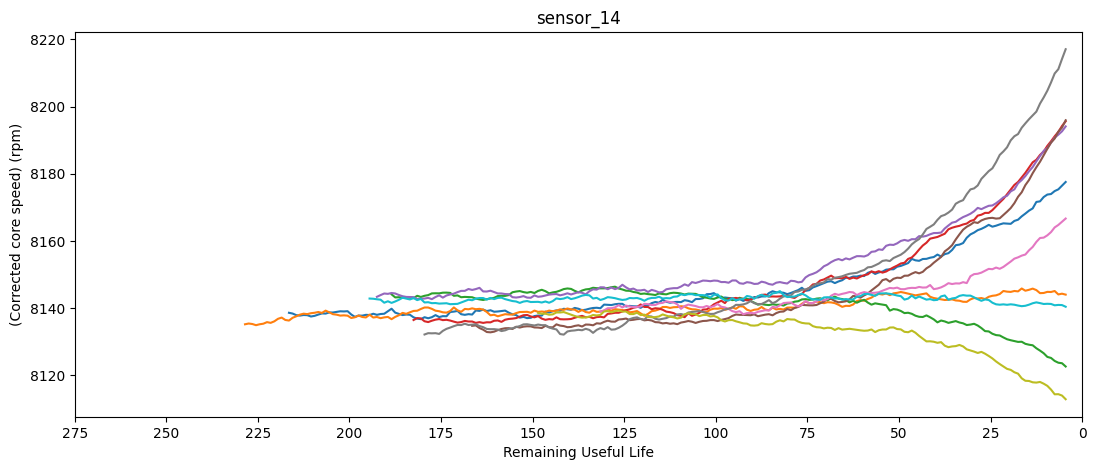

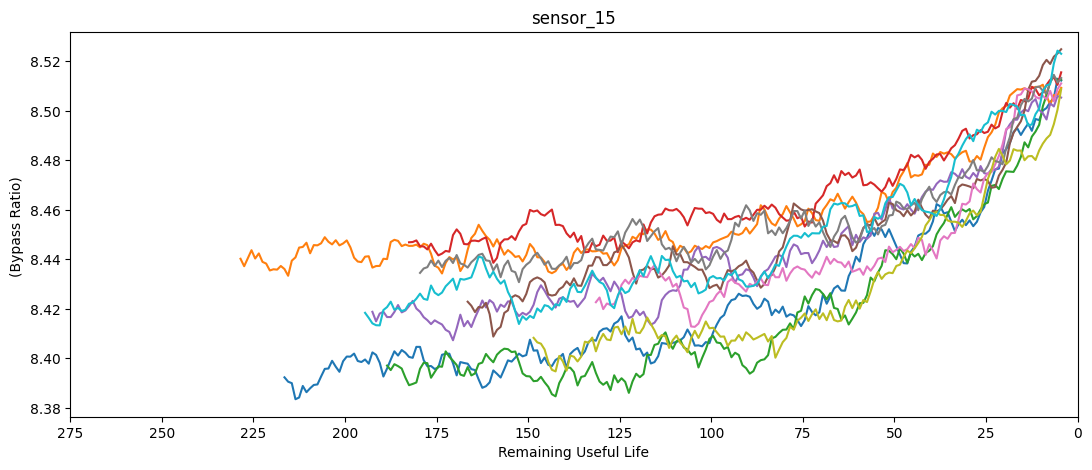

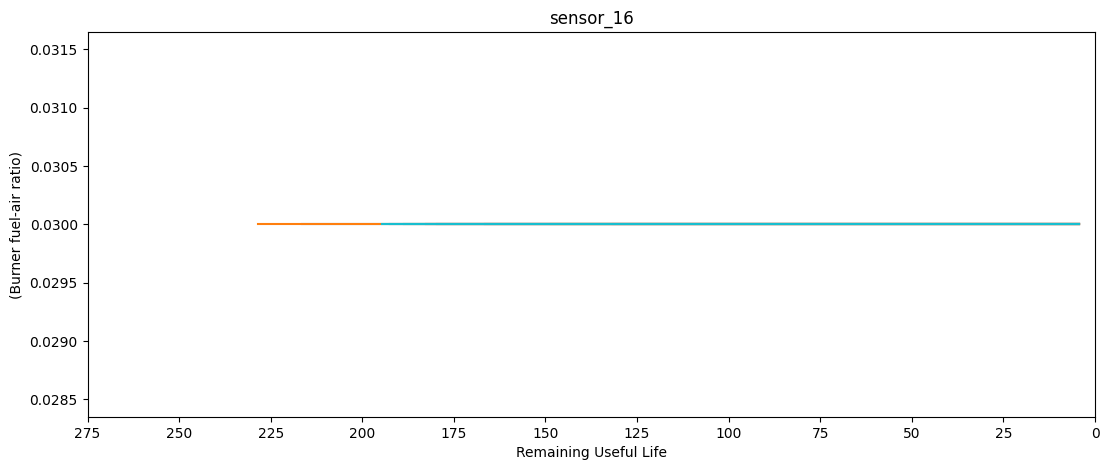

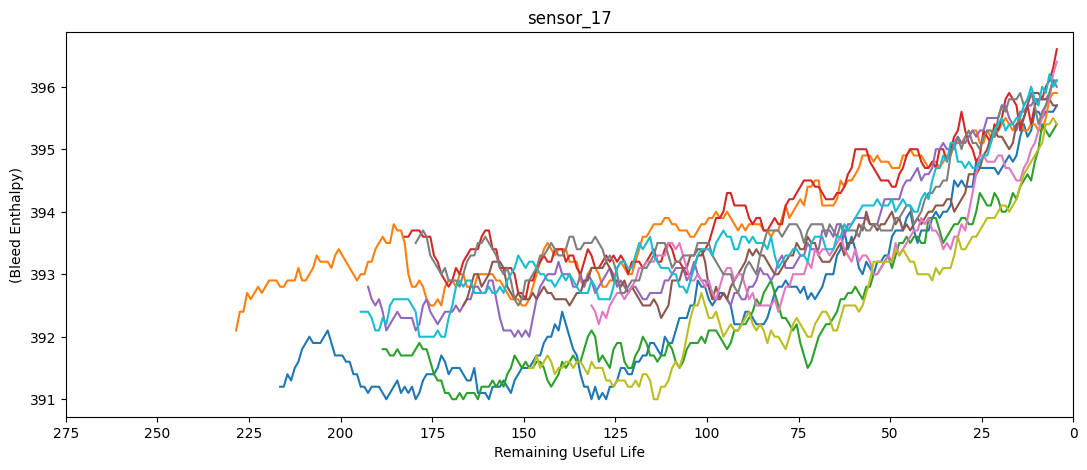

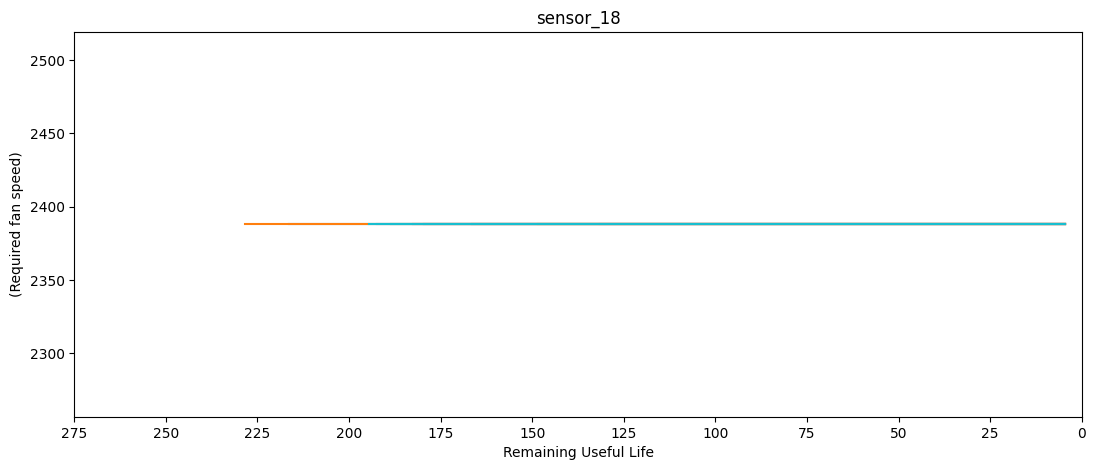

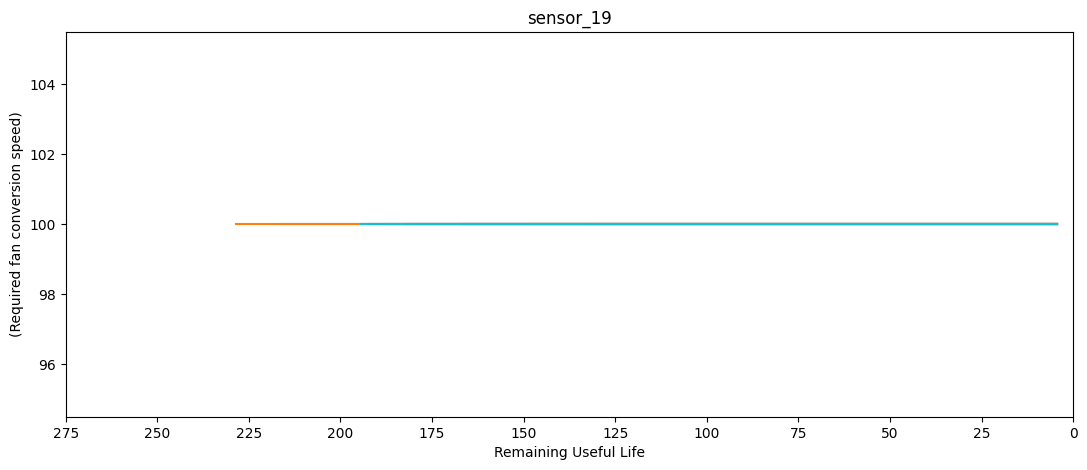

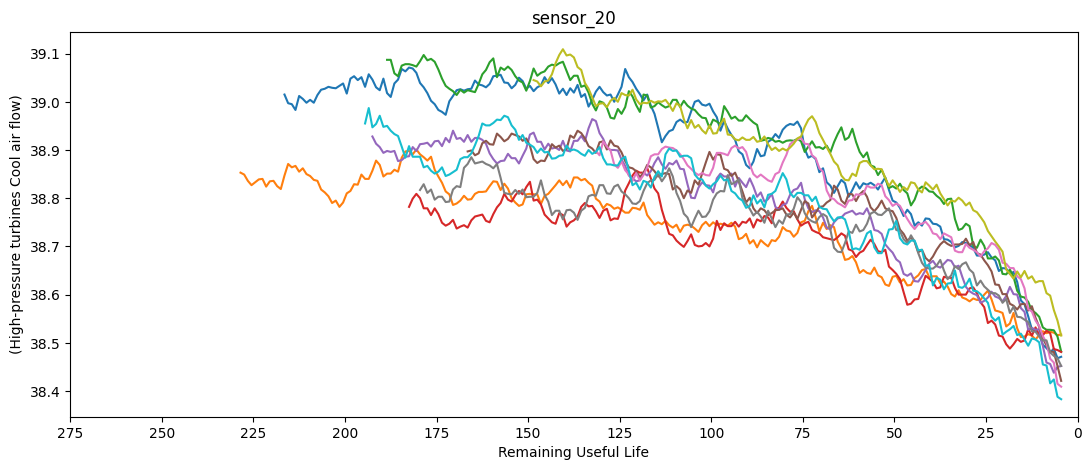

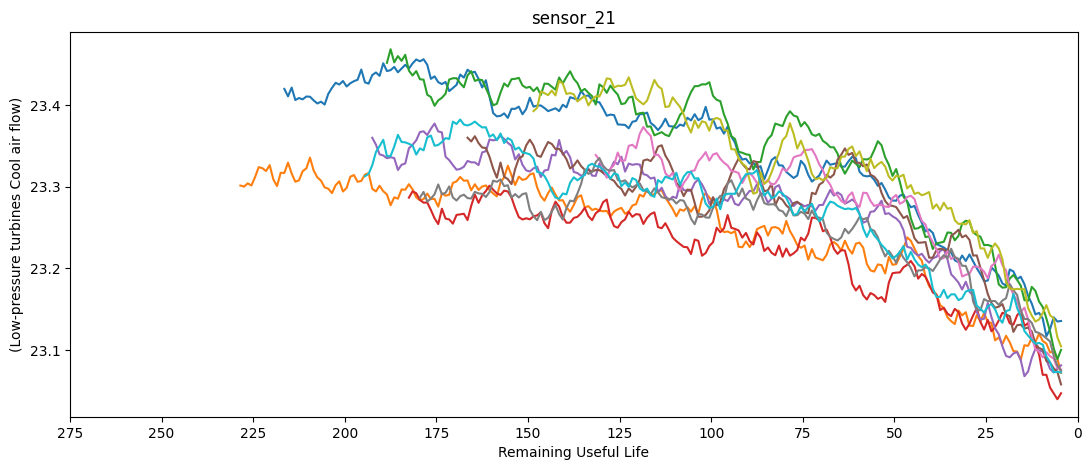

In [8]:
def plot_signal(df, Sensor_dic, signal_name):
  plt.figure(figsize=(13,5))
  for i in df['unit_number'].unique():
    if (i % 10 == 0):   #For a better visualisation, we plot the sensors signals of 10 units only
      plt.plot('RUL', signal_name, data=df[df['unit_number']==i].rolling(10).mean())
  plt.title(signal_name)
  plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
  plt.xticks(np.arange(0, 300, 25))
  plt.ylabel(Sensor_dic[signal_name])
  plt.xlabel('Remaining Useful Life')
  plt.show()

for i in range(1,22):
  try:
    plot_signal(train, Sensor_dictionary,'sensor_'+str(i))
  except:
    pass

Takes datalength and earlyrul as input and creates target RUL.

This function takes in two arguments, data_length and early_rul. It returns an array that represents the remaining useful life (RUL) for each cycle in the input data. If the early_rul_duration is less than or equal to 0, then the target variable is a reversed range of data_length-1 to 0.

In [9]:
def process_targets(data_length, early_rul):
  early_rul_duration = data_length - early_rul #壽命比early rul 多了多長
  if early_rul_duration <= 0: #如果壽命小於early rul，targets則不變 
    return np.arange(data_length-1, -1, -1)
  else:
    new_early_rul = early_rul * np.ones(early_rul_duration) #多出多少early rul
    origin_rul = np.arange(early_rul-1, -1, -1)
    return np.append(new_early_rul,origin_rul)

This function takes in input data and target data and processes them with a specified window length and shift size. The output_data is a numpy array with shape (num_batches, window_length, num_features). If target_data is not None, the function also outputs output_targets, a numpy array with shape (num_batches,) containing the target values for each batch.

*   此函數接收輸入數據和目標數據，並使用指定的窗口長度和移位大小處理它們。 
*   output_data是一個形狀為(num_batches, window_length, num_features)的numpy陣列
*   該函數還會輸出output_targets，這是一個形狀為(num_batches,)的numpy陣列，其中包含每個批次的目標值。

In [10]:
def process_input_data_with_targets(input_data, target_data , window_length , shift ):
  num_batches = np.int(np.floor((len(input_data) - window_length)/shift)) + 1 #共有多少組小資料
  num_features = input_data.shape[1] #每筆資料的特徵數
  output = np.repeat(np.nan, repeats = num_batches * window_length * num_features)
  output_data = output.reshape(num_batches, window_length , num_features)

  if target_data is None: #測試資料無target data
    for batch in range(num_batches):
      output_data[batch,:,:] = input_data[(0+shift*batch):(0+shift*batch+window_length),:]
    return output_data
  else : #處理訓練資料的target data
    output_targets = np.repeat(np.nan, repeats = num_batches) #target rul
    for batch in range(num_batches):
      window_start = shift * batch
      window_end = window_start + window_length

      output_data[batch,:,:] = input_data[window_start:window_end,:]
      output_targets[batch] = target_data[window_end-1]
    return output_data, output_targets

This function processes the test data for a single engine in preparation for making predictions using a trained model. It takes in the test data for a single engine (test_data_for_an_engine), the window_length and shift parameters that were used in preparing the training data, and the number of test windows (num_test_windows) that should be processed.

* 此函數處理單個引擎的測試數據，為使用經過訓練的模型進行預測做準備
* 它接收單個引擎的測試數據 (test_data_for_an_engine)
* 準備訓練數據時使用的 window_length 和 shift 參數，以及應處理的測試窗口數 (num_test_windows)。


In [11]:
def process_test_data(test_data_for_an_engine, window_length, shift, num_test_windows = 1):
  
    max_num_test_batches = np.int(np.floor((len(test_data_for_an_engine) - window_length)/shift)) + 1 #共有多少組小資料

    if max_num_test_batches < num_test_windows:
        required_len = (max_num_test_batches -1)* shift + window_length
        batched_test_data_for_an_engine = process_input_data_with_targets(test_data_for_an_engine[-required_len:, :],
                                          target_data = None,
                                          window_length = window_length, shift = shift)
        return batched_test_data_for_an_engine, max_num_test_batches
    else:
        required_len = (num_test_windows - 1) * shift + window_length
        batched_test_data_for_an_engine = process_input_data_with_targets(test_data_for_an_engine[-required_len:, :],
                                          target_data = None,
                                          window_length = window_length, shift = shift)
        return batched_test_data_for_an_engine, num_test_windows

The default option is to take only the last window of test data for each engine, which amounts to one window. However, if you set the number to a different value, that many windows from the last will be taken, and the final output will be the average of all the windows.

默認選項是只取每個引擎的最後一個窗口的測試數據，這相當於一個窗口。 但是，如果您將數字設置為不同的值，那麼將採用上一個窗口的多個窗口，最終輸出將是所有窗口的平均值。

In [12]:
# test_data = pd.read_csv("/kaggle/input/nasa-cmaps/CMaps/test_FD001.txt", sep = "\s+", header = None,names=columns_train )
# true_rul = pd.read_csv("/kaggle/input/nasa-cmaps/CMaps/RUL_FD001.txt", sep = '\s+', header = None

drop_labels = ['sensor_1', 'sensor_5','sensor_6','sensor_10',  'sensor_16', 'sensor_18', 'sensor_19']
train_data_first_column = train["unit_number"]
test_data_first_column = test["unit_number"]

In [13]:
# scaler = StandardScaler()
scaler = MinMaxScaler()

train_data = scaler.fit_transform(train.drop(columns = ['unit_number'] + setting_names + drop_labels+['RUL'] ))
test_data = scaler.transform(test.drop(columns = ['unit_number'] + setting_names+ drop_labels ))

train_data = pd.DataFrame(data = np.c_[train_data_first_column, train_data])
test_data = pd.DataFrame(data = np.c_[test_data_first_column, test_data])

num_train_machines = len(train_data[0].unique())
num_test_machines = len(test_data[0].unique())

It is important to process the training and test data separately since the number of engines in each set may differ.
Since we scale the entire dataset, we do not need to be concerned about the differing number of engines between the training and test sets.

In [14]:
window_length = 30
shift = 1
early_rul = 125
num_test_windows = 5

## 處理訓練資料

In [15]:
processed_train_data = []
processed_train_targets = []

for i in np.arange(1, num_train_machines + 1):
    temp_train_data = train_data[train_data[0] == i].drop(columns = [0]).values #每台機器的資料
    
    temp_train_targets = process_targets(data_length = temp_train_data.shape[0], early_rul = early_rul)
    data_for_a_machine, targets_for_a_machine = process_input_data_with_targets(temp_train_data, temp_train_targets,window_length= window_length, shift = shift)
    
    processed_train_data.append(data_for_a_machine)
    processed_train_targets.append(targets_for_a_machine)

processed_train_data = np.concatenate(processed_train_data)
processed_train_targets = np.concatenate(processed_train_targets)

## 處理測試資料

In [16]:
processed_test_data = []
num_test_windows_list = []

for i in np.arange(1, num_test_machines + 1):
    temp_test_data = test_data[test_data[0] == i].drop(columns = [0]).values
    
    # Prepare test data
    test_data_for_an_engine, num_windows = process_test_data(temp_test_data, window_length=window_length, shift = shift,num_test_windows = num_test_windows)
    
    processed_test_data.append(test_data_for_an_engine)
    num_test_windows_list.append(num_windows)

processed_test_data = np.concatenate(processed_test_data)
true_rul = y_test.values

# Shuffle training data
index = np.random.permutation(len(processed_train_targets))
processed_train_data, processed_train_targets = processed_train_data[index], processed_train_targets[index]

In [17]:
print("Processed trianing data shape: ", processed_train_data.shape)
print("Processed training ruls shape: ", processed_train_targets.shape)
print("Processed test data shape: ", processed_test_data.shape)
print("True RUL shape: ", true_rul.shape)

Processed trianing data shape:  (17731, 30, 15)
Processed training ruls shape:  (17731,)
Processed test data shape:  (497, 30, 15)
True RUL shape:  (100, 1)


The shape of processed_train_data is (17731, 30, 14), which means we have 17731 engines, each with 30 time steps and 14 sensor readings at each time step.
The shape of processed_train_targets is (17731,), which means we have the corresponding target RUL values for the 17731 training samples.
The shape of processed_test_data is (497, 30, 14), which means we have 497 test or engines, each with 30 time steps and 14 sensor readings at each time step.
The shape of true_rul is (100,), which means we have the true RUL values for 100 test engines.

In [18]:
# 切分訓練及驗證資料
processed_train_data, processed_val_data, processed_train_targets, processed_val_targets = train_test_split(processed_train_data,
                                                        processed_train_targets,
                                                        test_size = 0.2,
                                                        random_state = 666)
print("Processed train data shape: ", processed_train_data.shape)
print("Processed validation data shape: ", processed_val_data.shape)
print("Processed train targets shape: ", processed_train_targets.shape)
print("Processed validation targets shape: ", processed_val_targets.shape)

Processed train data shape:  (14184, 30, 15)
Processed validation data shape:  (3547, 30, 15)
Processed train targets shape:  (14184,)
Processed validation targets shape:  (3547,)


In [19]:
# import model package
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.layers import TimeDistributed, Flatten
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

##  Convolutional Neural Network

In [20]:
def CNN_model(kernel_size,pool_size):
  input_shape = (window_length, 15)
  model = Sequential([
    layers.Conv1D(128, kernel_size = kernel_size, padding = "same", activation="relu", input_shape = input_shape),
    layers.MaxPooling1D(pool_size= pool_size, padding='same'),
    layers.Conv1D(128,kernel_size = kernel_size, padding = "same", activation="relu"),
    layers.MaxPooling1D(pool_size= pool_size, padding='same'),
    layers.GlobalAveragePooling1D(),
    # layers.Dropout(0.5),
    layers.Dense(96, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(1)
  ])
  model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))
  return model

CNN_model(kernel_size=3,pool_size=2).summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 128)           5888      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 15, 128)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 128)           49280     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 8, 128)           0         
 1D)                                                             
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                        

## GRU

In [21]:
def GRU_model():
  input_shape = (window_length, 15)
  model = Sequential([
    layers.GRU(128, input_shape = input_shape , return_sequences=True, activation = "tanh"),
    layers.GRU(64, activation = "tanh", return_sequences = True),
    layers.GRU(32, activation = "tanh"),
    layers.Dense(96, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(1)
  ])
  model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))
  return model

GRU_model().summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 128)           55680     
                                                                 
 gru_1 (GRU)                 (None, 30, 64)            37248     
                                                                 
 gru_2 (GRU)                 (None, 32)                9408      
                                                                 
 dense_3 (Dense)             (None, 96)                3168      
                                                                 
 dense_4 (Dense)             (None, 128)               12416     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 118,049
Trainable params: 118,049
Non-tr

## Long short-term memory

In [22]:
def LSTM_model():
  input_shape = (window_length, 15)
  model = Sequential([
    layers.LSTM(128, input_shape = input_shape , activation = "tanh"),
    layers.Dense(96, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(1)
  ])
  model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))
  return model

LSTM_model().summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               73728     
                                                                 
 dense_6 (Dense)             (None, 96)                12384     
                                                                 
 dense_7 (Dense)             (None, 128)               12416     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 98,657
Trainable params: 98,657
Non-trainable params: 0
_________________________________________________________________


## Stacked Long short-term memory

In [23]:
def Stacked_LSTM_model():
  input_shape = (window_length, 15)
  model = Sequential([
    layers.LSTM(128, input_shape = input_shape , return_sequences=True, activation = "tanh"),
    layers.LSTM(64, activation = "tanh", return_sequences = True),
    layers.LSTM(32, activation = "tanh"),
    layers.Dense(96, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(1)
  ])
  model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))
  return model

Stacked_LSTM_model().summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 30, 128)           73728     
                                                                 
 lstm_2 (LSTM)               (None, 30, 64)            49408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_9 (Dense)             (None, 96)                3168      
                                                                 
 dense_10 (Dense)            (None, 128)               12416     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 151,265
Trainable params: 151,265
Non-tr

## Bi-LSTM

In [24]:
def Bi_LSTM_model():
  input_shape = (window_length, 15)
  model = Sequential([
    layers.Bidirectional( LSTM(128, return_sequences = True, activation = "tanh") ),
    layers.Bidirectional( LSTM(64, activation = "tanh", return_sequences = True) ),
    layers.Bidirectional( LSTM(32, activation = "tanh") ),
    layers.Dense(96, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(1)
  ])
  model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))
  return model

# Bi_LSTM_model().summary()

## CNN+LSTM 

In [25]:
def CNN_LSTM_model(kernel_size,pool_size):
  input_shape = (window_length, 15)
  model = Sequential([
    layers.Conv1D(128, kernel_size = kernel_size, padding = "same", activation="relu", input_shape = input_shape),
    layers.MaxPooling1D(pool_size= pool_size, padding='same'),
    layers.Conv1D(128,kernel_size = kernel_size, padding = "same", activation="relu"),
    layers.MaxPooling1D(pool_size= pool_size, padding='same'),
    layers.TimeDistributed(Flatten()),
    layers.LSTM(128, return_sequences = True, activation = "tanh"),
    layers.LSTM(64, activation = "tanh", return_sequences = True),
    layers.LSTM(32, activation = "tanh"),
    layers.Dense(96, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(1)
  ])
  model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))
  return model

CNN_LSTM_model(kernel_size=3,pool_size=2).summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 30, 128)           5888      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 15, 128)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 15, 128)           49280     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 8, 128)           0         
 1D)                                                             
                                                                 
 time_distributed (TimeDistr  (None, 8, 128)           0         
 ibuted)                                                         
                                                      

In [26]:
def scheduler(epoch):
  if epoch < 10:
    return 0.001
  else:
    return 0.0001

In [27]:
tf_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
callback = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose = 1)
batch_size = 50
epoch = 20
kernel_size = 3
pool_size = 2

In [28]:
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=4, min_lr=1e-7, verbose=1)
cnn_model = CNN_model(kernel_size= kernel_size ,pool_size = pool_size)
CNN_history = cnn_model.fit(processed_train_data, processed_train_targets, epochs = epoch,
                    validation_data = (processed_val_data, processed_val_targets),
                    callbacks = [tf_callback,callback],
                    batch_size = batch_size, verbose = 1)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/20
284/284 [==============================] - 6s 7ms/step - loss: 1227.4191 - val_loss: 497.9649 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/20
284/284 [==============================] - 1s 5ms/step - loss: 465.3860 - val_loss: 440.3976 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/20
284/284 [==============================] - 1s 5ms/step - loss: 408.8773 - val_loss: 429.3984 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/20
284/284 [==============================] - 2s 5ms/step - loss: 378.6463 - val_loss: 362.0242 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/20
284/284 [==============================] - 2s 8ms/step - loss: 353.6636 - val_loss: 336.6132 - lr: 0.0010

Epoch 6: LearningRateScheduler setting learning rate to 0.001.
Epoch 6/20
284/284 [==========

In [29]:
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=4, min_lr=1e-7, verbose=1)
gru_model = GRU_model()
GRU_history = gru_model.fit(processed_train_data, processed_train_targets, epochs = epoch,
                    validation_data = (processed_val_data, processed_val_targets),
                    callbacks = [tf_callback,callback],
                    batch_size = batch_size, verbose = 1)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/20
284/284 [==============================] - 11s 13ms/step - loss: 2590.4673 - val_loss: 1738.4426 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/20
284/284 [==============================] - 3s 9ms/step - loss: 1225.5966 - val_loss: 363.2727 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/20
284/284 [==============================] - 4s 12ms/step - loss: 237.7280 - val_loss: 163.0812 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/20
284/284 [==============================] - 3s 10ms/step - loss: 171.5448 - val_loss: 140.1013 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/20
284/284 [==============================] - 3s 9ms/step - loss: 164.0189 - val_loss: 143.5419 - lr: 0.0010

Epoch 6: LearningRateScheduler setting learning rate to 0.001.
Epoch 6/20
284/284 [====

In [30]:
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=4, min_lr=1e-7, verbose=1)
lstm_model = LSTM_model()
LSTM_history = lstm_model.fit(processed_train_data, processed_train_targets, epochs = epoch,
                    validation_data = (processed_val_data, processed_val_targets),
                    callbacks = [tf_callback,callback],
                    batch_size = batch_size, verbose = 1)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/20
284/284 [==============================] - 7s 9ms/step - loss: 2295.4766 - val_loss: 1709.7697 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/20
284/284 [==============================] - 2s 6ms/step - loss: 875.2496 - val_loss: 381.6778 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/20
284/284 [==============================] - 2s 6ms/step - loss: 375.9538 - val_loss: 324.0593 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/20
284/284 [==============================] - 2s 6ms/step - loss: 241.2805 - val_loss: 235.9752 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/20
284/284 [==============================] - 2s 6ms/step - loss: 196.9248 - val_loss: 188.2860 - lr: 0.0010

Epoch 6: LearningRateScheduler setting learning rate to 0.001.
Epoch 6/20
284/284 [=========

In [31]:
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=4, min_lr=1e-7, verbose=1)
stacked_lstm_model = Stacked_LSTM_model()
stacked_LSTM_history = stacked_lstm_model.fit(processed_train_data, processed_train_targets, epochs = epoch,
                    validation_data = (processed_val_data, processed_val_targets),
                    callbacks = [tf_callback,callback],
                    batch_size = batch_size, verbose = 1)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/20
284/284 [==============================] - 10s 15ms/step - loss: 2523.9016 - val_loss: 1739.4570 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/20
284/284 [==============================] - 4s 13ms/step - loss: 1758.2152 - val_loss: 1738.6549 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/20
284/284 [==============================] - 3s 10ms/step - loss: 1755.6758 - val_loss: 1754.3175 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/20
284/284 [==============================] - 3s 10ms/step - loss: 1620.6517 - val_loss: 542.3213 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/20
284/284 [==============================] - 3s 10ms/step - loss: 356.0333 - val_loss: 271.8163 - lr: 0.0010

Epoch 6: LearningRateScheduler setting learning rate to 0.001.
Epoch 6/20
284/284

In [32]:
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=4, min_lr=1e-7, verbose=1)
bi_lstm_model = Bi_LSTM_model()
Bi_LSTM_history = bi_lstm_model.fit(processed_train_data, processed_train_targets, epochs = epoch,
                    validation_data = (processed_val_data, processed_val_targets),
                    callbacks = [tf_callback,callback],
                    batch_size = batch_size, verbose = 1)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/20
284/284 [==============================] - 21s 28ms/step - loss: 1837.8348 - val_loss: 424.7524 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/20
284/284 [==============================] - 5s 16ms/step - loss: 429.7130 - val_loss: 383.0732 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/20
284/284 [==============================] - 5s 16ms/step - loss: 384.1841 - val_loss: 394.8447 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/20
284/284 [==============================] - 6s 19ms/step - loss: 374.3861 - val_loss: 361.6246 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/20
284/284 [==============================] - 5s 17ms/step - loss: 359.0846 - val_loss: 336.8792 - lr: 0.0010

Epoch 6: LearningRateScheduler setting learning rate to 0.001.
Epoch 6/20
284/284 [====

In [33]:
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=4, min_lr=1e-7, verbose=1)
cnn_lstm_model = CNN_LSTM_model(kernel_size= kernel_size ,pool_size = pool_size)
CNN_LSTM_history = cnn_lstm_model.fit(processed_train_data, processed_train_targets, epochs = epoch,
                    validation_data = (processed_val_data, processed_val_targets),
                    callbacks = [tf_callback,callback],
                    batch_size = batch_size, verbose = 1)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/20
284/284 [==============================] - 12s 18ms/step - loss: 2469.5813 - val_loss: 1750.3326 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/20
284/284 [==============================] - 3s 10ms/step - loss: 479.7621 - val_loss: 217.4210 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/20
284/284 [==============================] - 3s 10ms/step - loss: 207.3788 - val_loss: 250.7644 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/20
284/284 [==============================] - 3s 10ms/step - loss: 174.4574 - val_loss: 143.5936 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/20
284/284 [==============================] - 4s 13ms/step - loss: 165.7116 - val_loss: 208.0304 - lr: 0.0010

Epoch 6: LearningRateScheduler setting learning rate to 0.001.
Epoch 6/20
284/284 [===

In [34]:
# %reload_ext tensorboard
# %tensorboard --logdir='./logs'

## summarize history for loss


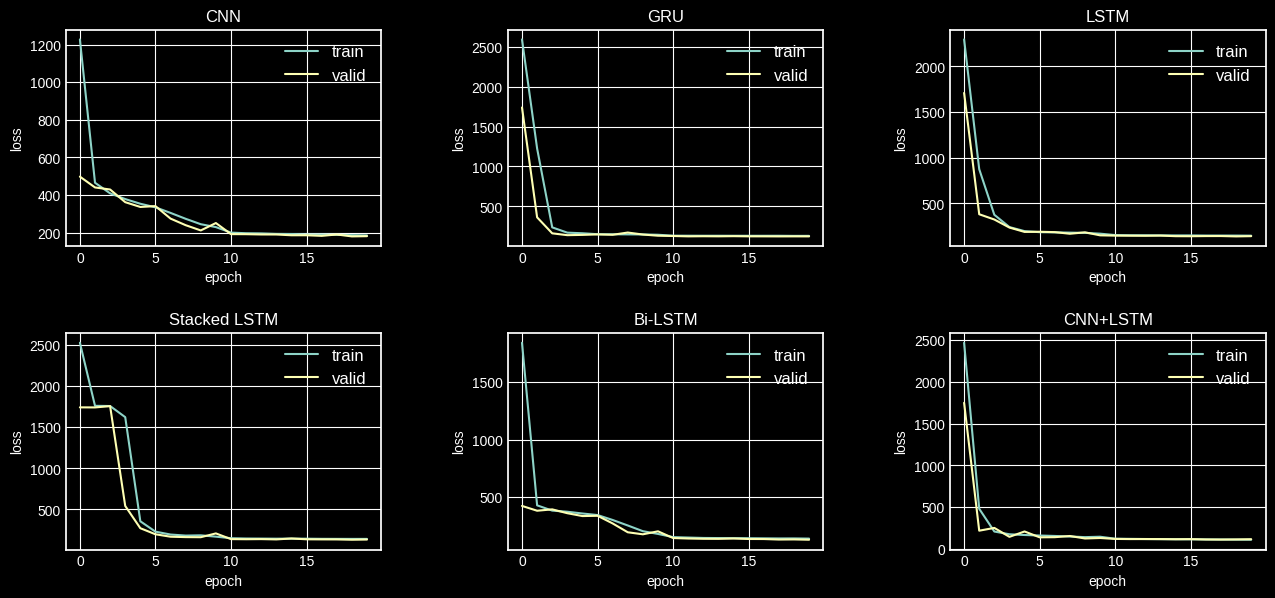

In [40]:
import matplotlib.pyplot as plt
model_list = [CNN_history,GRU_history,LSTM_history,stacked_LSTM_history,Bi_LSTM_history,CNN_LSTM_history]
model_name = ['CNN','GRU','LSTM','Stacked LSTM','Bi-LSTM','CNN+LSTM']

plt.figure(figsize = (20, 4), dpi = 100)
plt.style.use('dark_background') # seaborn-dark-palette / ggplot
plt.subplots_adjust(left = 0.1, bottom = 0.2, right = 0.7, top = 1.5, wspace = 0.4, hspace = 0.4)
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.plot(model_list[i].history['loss'])
  plt.plot(model_list[i].history['val_loss'])
  plt.title(model_name[i])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'valid'],fontsize =12)
  plt.grid('on')
plt.show()

In [36]:
#evaluate model performance
def evaluate(true_rul ,pred_rul, model):
  MAE = mean_absolute_error(true_rul, pred_rul)
  RMSE = np.sqrt(mean_squared_error(true_rul, pred_rul))
  r2 = r2_score(true_rul, pred_rul)
  print("R-square: ",r2,'MAE: ',MAE,"RMSE: ", RMSE)

#plot real data and the predicted one to make some comparison
def plot_predActual(y_test, y_predictions,model_name):
  plt.style.use('seaborn-white')
  plt.rcParams['figure.figsize']=20,5
  fig,ax = plt.subplots()
  plt.title( model_name +' prediction result')
  plt.ylabel('RUL',fontsize =16)
  plt.xlabel('Test Engine Units',fontsize =16)
  g = sns.lineplot(x = np.arange(0,len(train['unit_number'].unique())),y = y_test,color='lightseagreen',label = 'actual',ax=ax)
  f = sns.lineplot(x = np.arange(0,len(train['unit_number'].unique())),y = y_predictions,color='salmon',label = 'predictions',ax=ax)
  ax.grid(True)
  ax.legend()
  plt.show()

In [37]:
models = {"CNN":cnn_model,"GRU":gru_model,"LSTM":lstm_model,'Stacked LSTM':stacked_lstm_model, 'Bi-LSTM': bi_lstm_model ,"CNN+LSTM":cnn_lstm_model}

for model_name, model in models.items():
  print("----------------",model_name,"----------------")
  rul_pred = model.predict(processed_test_data).reshape(-1)
  preds_for_each_engine = np.split(rul_pred, np.cumsum(num_test_windows_list)[:-1])
  mean_pred_for_each_engine = [np.average(ruls_for_each_engine, weights = np.repeat(1/num_windows, num_windows)) 
                              for ruls_for_each_engine, num_windows in zip(preds_for_each_engine, num_test_windows_list)]
  evaluate(true_rul, mean_pred_for_each_engine, model_name)

---------------- CNN ----------------
16/16 [==============================] - 0s 5ms/step
R-square:  0.8583080892945889 MAE:  11.628605581283571 RMSE:  15.642360856440087
---------------- GRU ----------------
16/16 [==============================] - 1s 5ms/step
R-square:  0.8825599750858362 MAE:  10.867614005088804 RMSE:  14.240913202723764
---------------- LSTM ----------------
16/16 [==============================] - 0s 2ms/step
R-square:  0.8854305519598394 MAE:  10.323836012840273 RMSE:  14.06579172707078
---------------- Stacked LSTM ----------------
16/16 [==============================] - 1s 4ms/step
R-square:  0.8872816543760285 MAE:  10.537937310218814 RMSE:  13.9516982629474
---------------- Bi-LSTM ----------------
16/16 [==============================] - 2s 8ms/step
R-square:  0.8916008883270539 MAE:  10.203138575553893 RMSE:  13.681780973799269
---------------- CNN+LSTM ----------------
16/16 [==============================] - 1s 5ms/step
R-square:  0.8699573328670187 MAE

16/16 [==============================] - 0s 3ms/step


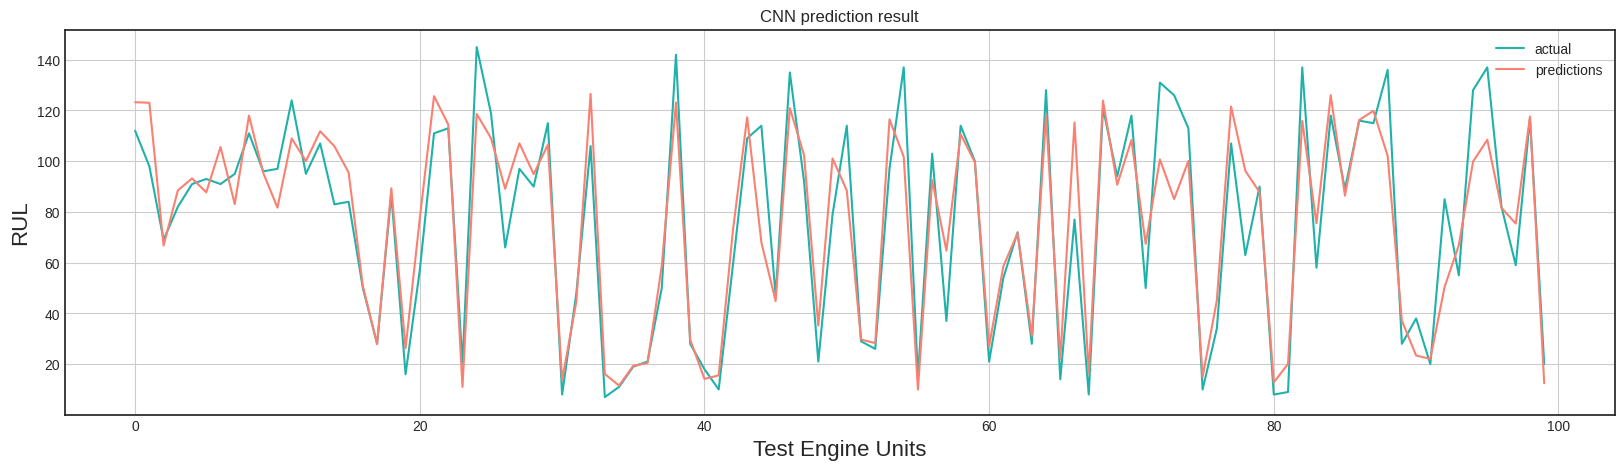

16/16 [==============================] - 0s 5ms/step


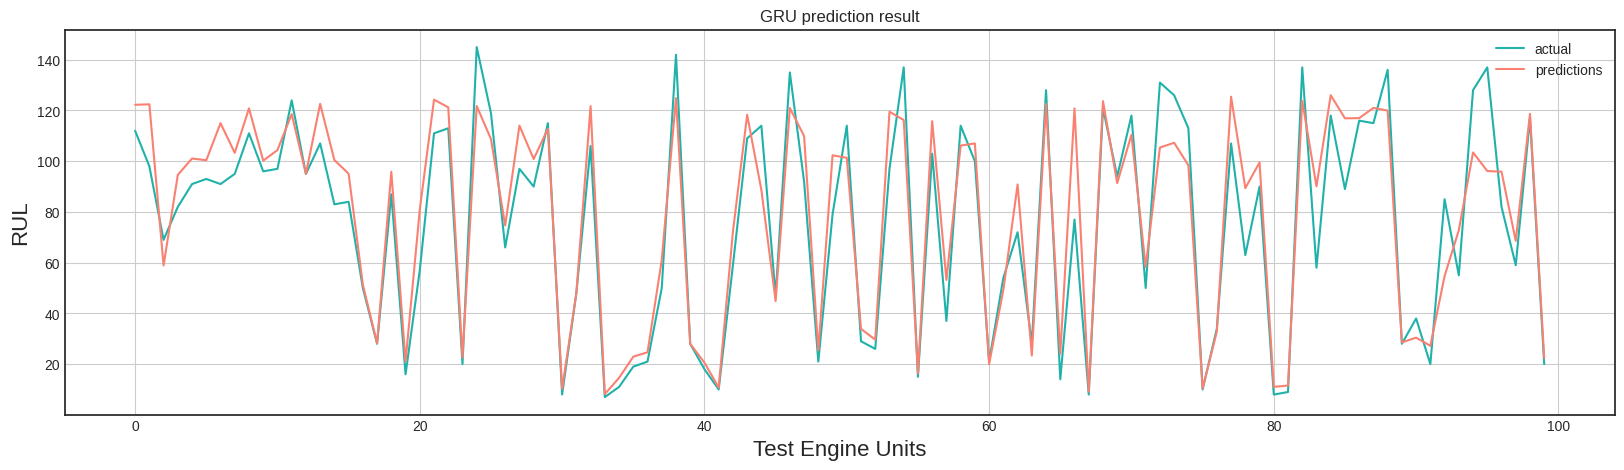

16/16 [==============================] - 0s 3ms/step


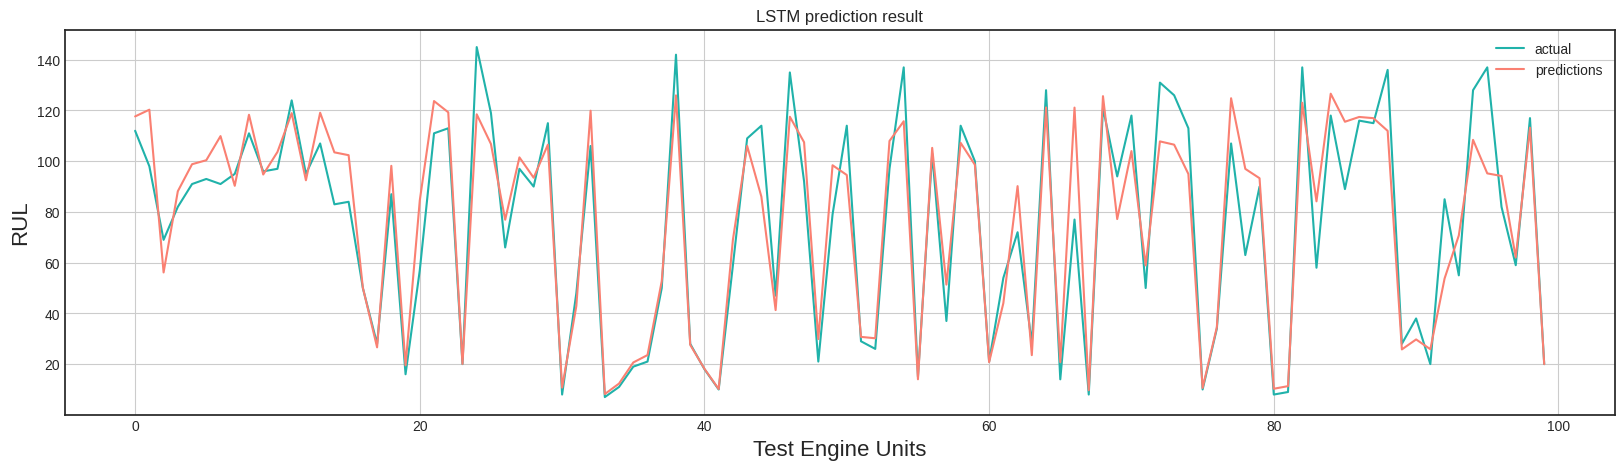

16/16 [==============================] - 0s 5ms/step


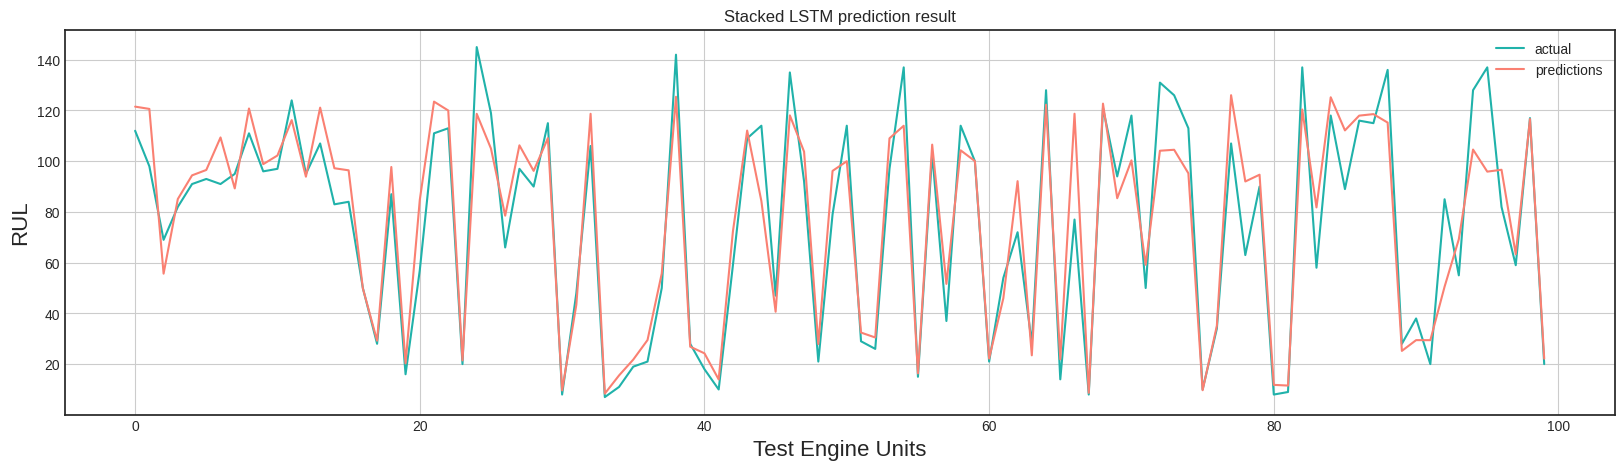

16/16 [==============================] - 0s 9ms/step


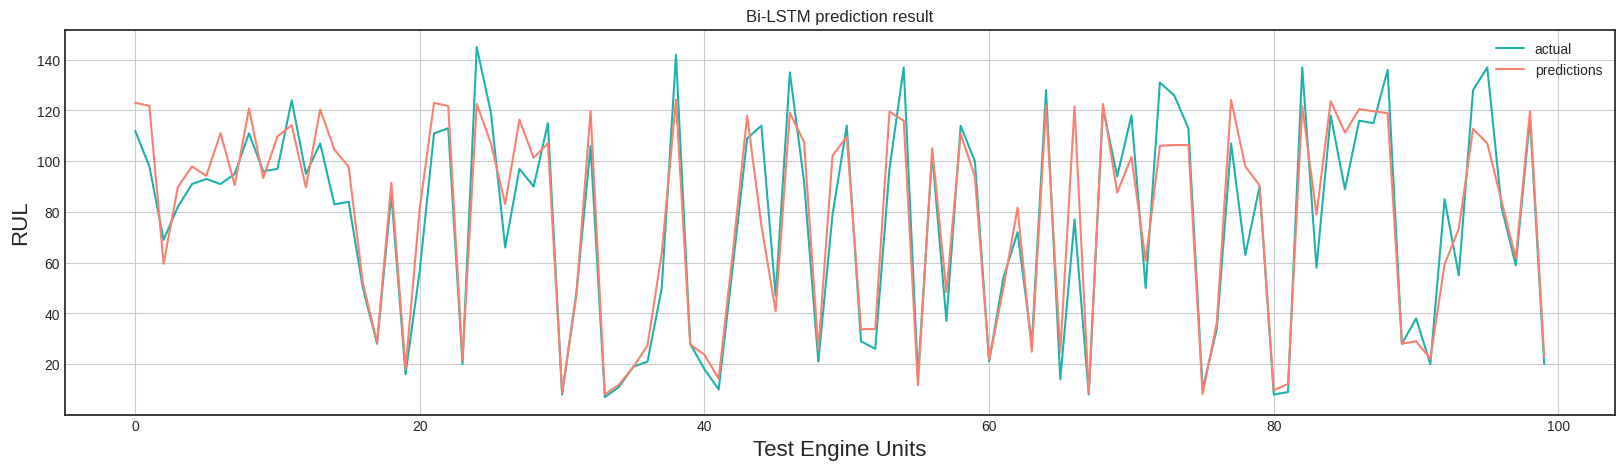

16/16 [==============================] - 0s 5ms/step


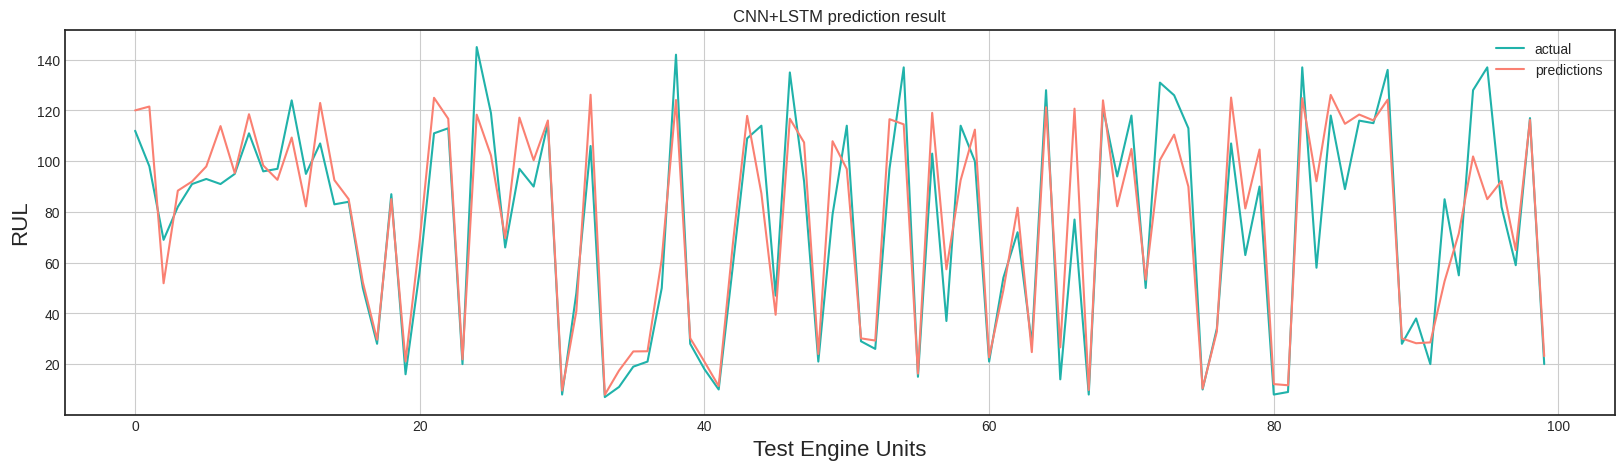

In [38]:
for model_name, model in models.items():
  rul_pred = model.predict(processed_test_data).reshape(-1)
  preds_for_each_engine = np.split(rul_pred, np.cumsum(num_test_windows_list)[:-1])
  mean_pred_for_each_engine = [np.average(ruls_for_each_engine, weights = np.repeat(1/num_windows, num_windows)) 
                              for ruls_for_each_engine, num_windows in zip(preds_for_each_engine, num_test_windows_list)]
  y_true = true_rul.reshape(1,len(true_rul))[0]
  plot_predActual(y_true, mean_pred_for_each_engine,model_name)